## Time Series Forecasting - Choosing the Target Variable

### Target Variables: 
**Average Daily Consumption per Household**: Total consumption divided by the number of households, reflecting average household usage.


> **Total_Daily_Consumption** is stored as KW/D
> , LCLid is housecount (5,567 London Households)

> 1. **temperatureMax**: The maximum temperature recorded on that day.
> 2. **windBearing**: This is a compass direction in degrees (0 to 360) from which the wind is coming. For example, a wind bearing of 0 degrees is coming from the North, 90 degrees from the East, 180 degrees from the South, and 270 degrees from the West.
> 3. **dewPoint**: The temperature at which dew can form. It's a measure of atmospheric moisture. If the air temperature drops to the dew point, dew will form on surfaces.
> 4. **cloudCover**: This is a measure of the fraction of the sky obscured by clouds when observed from a particular location. It's often expressed as a percentage.
> 5. **windSpeed**: The speed of the wind, usually measured in miles per hour or kilometers per hour.
> 6. **pressure**: Atmospheric pressure, usually measured in millibars. It indicates the weight of the air above us and can be used to predict weather changes.
> 7. **apparentTemperatureHigh**: This is the highest perceived temperature, taking into account not just the air temperature, but also relative humidity, wind speed, and other factors.
> 8. **visibility**: How clear the air is. High visibility means you can see far into the distance, which is usually higher in dry, clear weather.
> 9. **humidity**: The amount of water vapor present in the air, expressed as a percentage.
> 10. **apparentTemperatureLow**: The lowest perceived temperature for the day, considering factors like wind chill and humidity.
> 11. **apparentTemperatureMax**: The maximum perceived temperature, considering factors like wind chill and humidity.
> 12. **uvIndex**: The strength of the ultraviolet (UV) radiation from the sun. A higher index indicates a greater risk of skin damage and the need for protective measures.
> 13. **temperatureLow**: The lowest actual air temperature recorded on that day.
> 14. **temperatureMin**: This is similar to temperatureLow, and may either be a duplicate or represent the minimum temperature over a different time frame (such as night-time).
> 15. **temperatureHigh**: The highest actual air temperature recorded on that day.
> 16. **apparentTemperatureMin**: The minimum perceived temperature for the day, considering factors like wind chill and humidity.
> 17. **moonPhase**: This indicates the phase of the moon on a particular day. It's usually a value between 0 and 1, where 0 indicates a new moon, 0.25 a first quarter moon, 0.5 a full moon, and 0.75 a last quarter moon.

### Finding Relationship between energy consumption & Weather

##### Temperature

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA  
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date as dt

In [2]:
energy_weather = pd.read_hdf('../Data/data.h5',key='df')

In [3]:
energy_weather

,Day,Total_Daily_Consumption,LCLid,avg_energy,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,...,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,Bank holidays,Type,holiday_ind
0,2011-11-23,90.385000,13,6.952692,10.36,229,6.29,0.36,2.04,1027.12,...,10.36,1.0,8.24,3.81,10.36,2.18,0.94,NaT,NaN,0
1,2011-11-24,213.412000,25,8.536480,12.93,204,8.56,0.41,4.04,1027.22,...,12.93,1.0,9.71,8.56,12.93,7.01,0.97,NaT,NaN,0
2,2011-11-25,303.993000,32,9.499781,13.03,243,7.24,0.48,5.02,1024.47,...,13.03,1.0,7.01,7.46,12.27,4.84,0.01,NaT,NaN,0
3,2011-11-26,420.976000,41,10.267707,12.96,237,6.96,0.44,5.75,1025.80,...,12.96,1.0,11.59,7.01,12.96,4.69,0.05,NaT,NaN,0
4,2011-11-27,444.883001,41,10.850805,13.54,256,5.76,0.42,5.48,1021.11,...,13.54,1.0,1.31,4.47,13.54,2.94,0.08,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2014-02-24,51994.547004,4994,10.411403,14.23,183,6.03,0.50,5.02,1005.19,...,14.23,1.0,8.25,7.99,14.23,5.52,0.82,NaT,NaN,0
824,2014-02-25,51423.508001,4995,10.294997,11.43,202,5.06,0.62,5.69,1000.65,...,11.43,1.0,4.17,6.79,10.31,3.89,0.86,NaT,NaN,0
825,2014-02-26,50943.305995,4993,10.202945,11.29,227,2.74,0.26,3.82,1012.73,...,11.29,2.0,6.01,4.17,11.29,1.67,0.90,NaT,NaN,0
826,2014-02-27,51678.185998,4990,10.356350,10.31,224,3.08,0.32,4.14,1007.02,...,10.31,2.0,3.43,3.93,10.31,1.41,0.93,NaT,NaN,0


#### Temperature variables

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

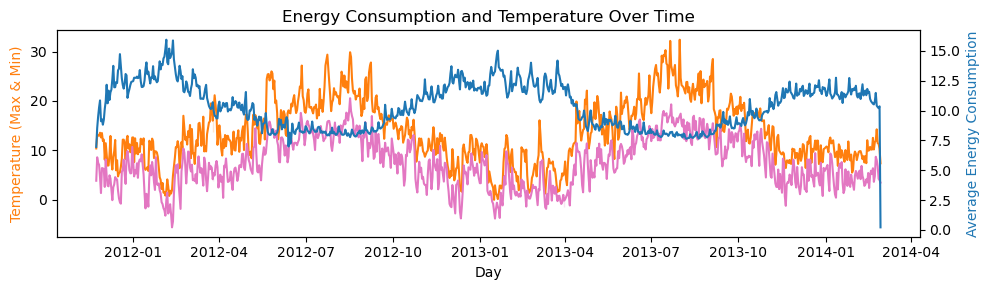

In [4]:
fig, ax1 = plt.subplots(figsize=(10,3))
# Plotting temperatureMax and temperatureMin on the primary y-axis
sns.lineplot(data=energy_weather, x='Day', y='temperatureMax', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='temperatureMin', color='tab:pink', ax=ax1)
# Creating a secondary y-axis for avg_energy
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
# Setting labels for clarity
ax1.set_xlabel('Day')
ax1.set_ylabel('Temperature (Max & Min)', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
# Adding title
plt.title('Energy Consumption and Temperature Over Time')
# Adjusting layout and showing the plot
fig.tight_layout()
plt.show()


> We see that the avg energy consumption has a strong inverse relationship with the temperatureMax variable.

#### Humidity

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

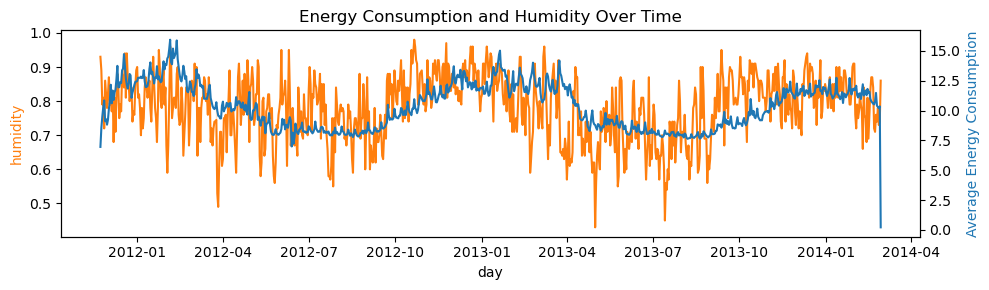

In [5]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='humidity', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
# Setting labels for clarity
ax1.set_xlabel('day')
ax1.set_ylabel('humidity', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
# Adding title
plt.title('Energy Consumption and Humidity Over Time')
# Adjusting layout and showing the plot
fig.tight_layout()
plt.show()

> Humidity and avg_energy consumption tend to have the same trend

#### Cloud Cover

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

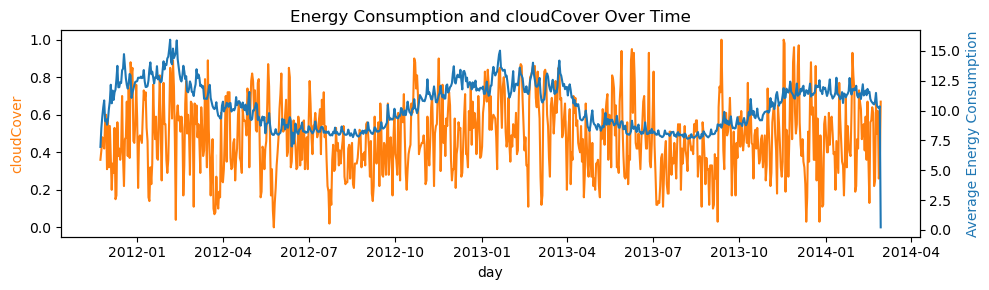

In [6]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='cloudCover', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
ax1.set_xlabel('day')
ax1.set_ylabel('cloudCover', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
plt.title('Energy Consumption and cloudCover Over Time')
fig.tight_layout()
plt.show()

> Cloud Cover and avg_energy consumption tend to have the same trend

#### Visibility

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

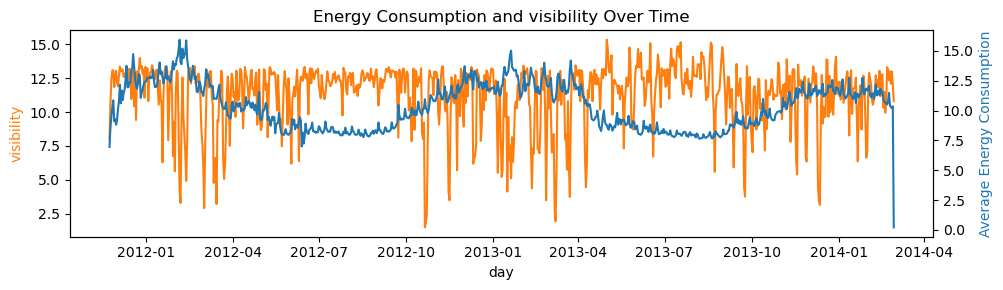

In [7]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='visibility', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
ax1.set_xlabel('day')
ax1.set_ylabel('visibility', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
plt.title('Energy Consumption and visibility Over Time')
fig.tight_layout()
plt.show()

> This does not seem to affect the energy consumption since it is an outdoor factor, and the graph doesn't show a clear relationship between them

#### Wind Speed

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

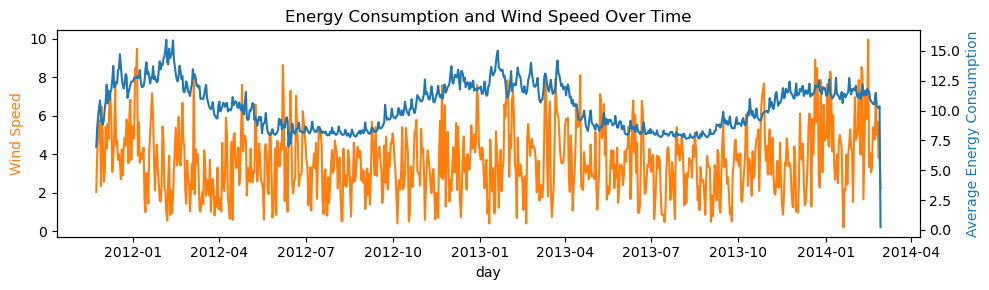

In [8]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='windSpeed', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
ax1.set_xlabel('day')
ax1.set_ylabel('Wind Speed', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
plt.title('Energy Consumption and Wind Speed Over Time')
fig.tight_layout()
plt.show()

> Wind Speed seems to have a correlation to Energy consumption but its at a low correlation.

#### UV

C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\visot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

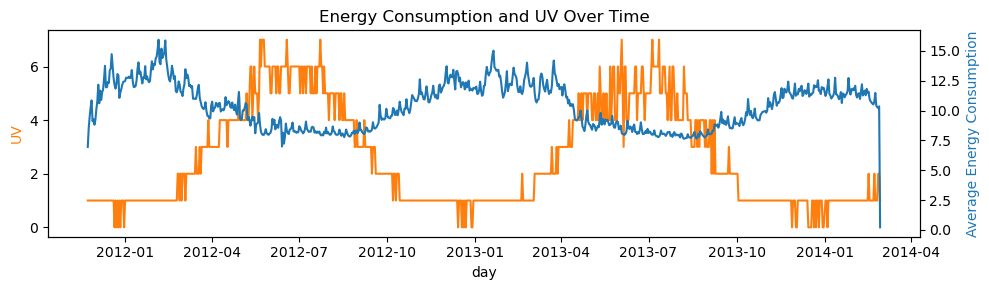

In [9]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax2 = ax1.twinx()
sns.lineplot(data=energy_weather, x='Day', y='uvIndex', color='tab:orange', ax=ax1)
sns.lineplot(data=energy_weather, x='Day', y='avg_energy', color='tab:blue', ax=ax2)
ax1.set_xlabel('day')
ax1.set_ylabel('UV', color='tab:orange')
ax2.set_ylabel('Average Energy Consumption', color='tab:blue')
plt.title('Energy Consumption and UV Over Time')
fig.tight_layout()
plt.show()

> similar to temperature, UV Index has a clear inverse relationship with energy consumption over time.

Text(0.5, 1.0, 'Correlation Heatmap')

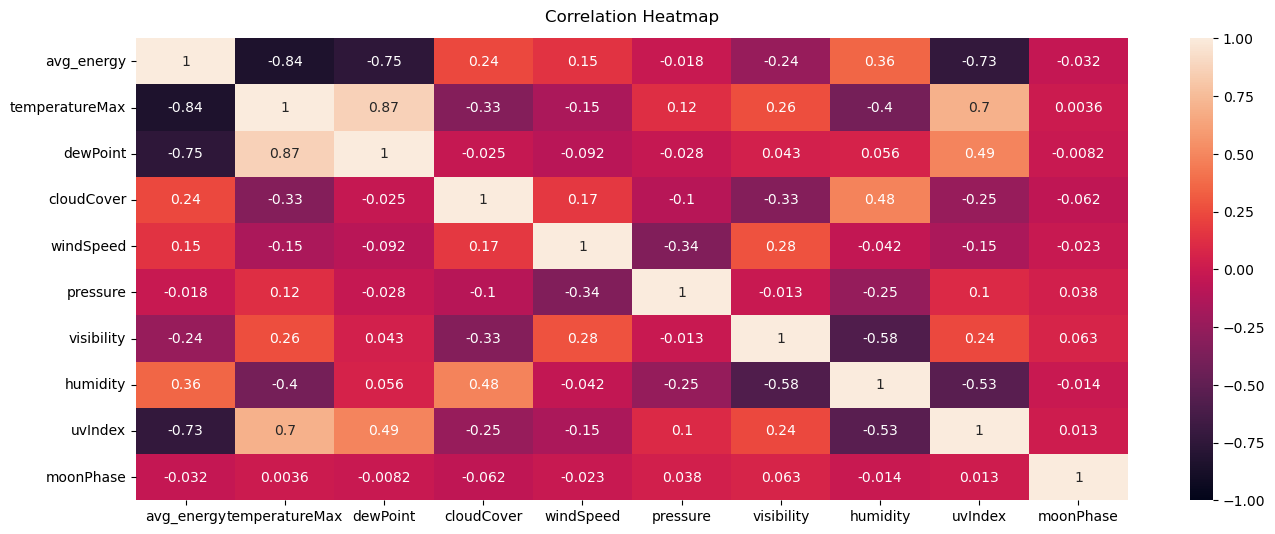

In [10]:
correlation = energy_weather[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']]
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(correlation.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Clustering weather

In [11]:
#scaling
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(energy_weather[['temperatureMax','humidity','windSpeed']])

C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

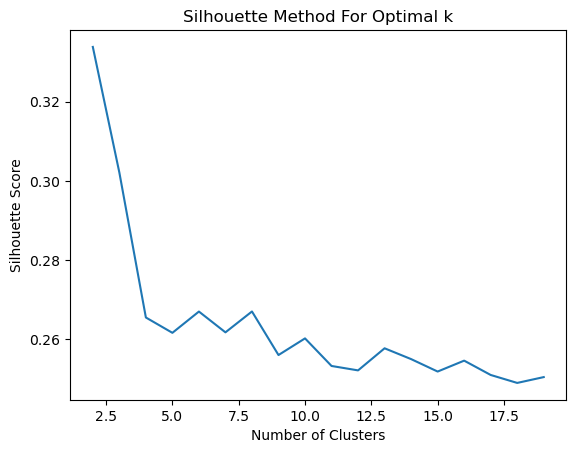

In [12]:
#optimize K
from sklearn.metrics import silhouette_score

silhouette_scores = []

Nc = range(2, 20)
for i in Nc:
    kmeans = KMeans(n_clusters=i).fit(weather_scaled)
    silhouette_scores.append(silhouette_score(weather_scaled, kmeans.labels_))

plt.plot(Nc, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
energy_weather['weather_cluster'] = kmeans.labels_

C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\visot\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


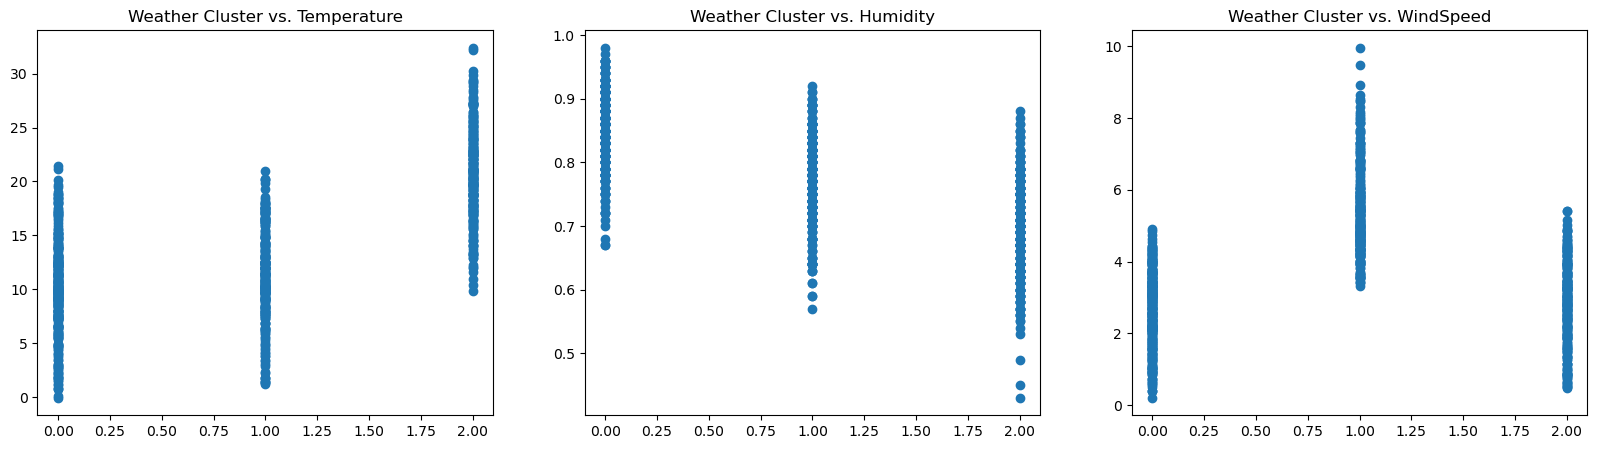

In [14]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(energy_weather.weather_cluster,energy_weather.temperatureMax)
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)
plt.scatter(energy_weather.weather_cluster,energy_weather.humidity)
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)
plt.scatter(energy_weather.weather_cluster,energy_weather.windSpeed)
plt.title('Weather Cluster vs. WindSpeed')
plt.show()

> it seems that temperature is a strong feature for clustering in this dataset, as it shows a clear distinction between the clusters. Humidity and wind speed, while they do contribute to the clustering, seem to have more overlap between clusters, suggesting that they are less distinct as sole clustering features.

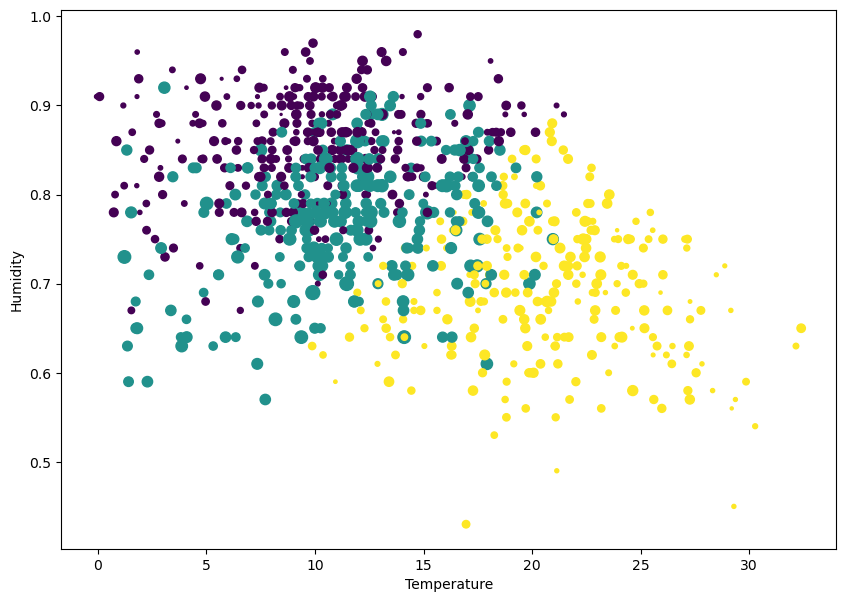

In [15]:
#The size of the data points corresponds to the wind speed,
#with larger points indicating higher wind speeds
fig, ax1 = plt.subplots(figsize = (10,7))
ax1.scatter(energy_weather.temperatureMax, 
            energy_weather.humidity, 
            s = energy_weather.windSpeed*10, # size of each datapoint
            c = energy_weather.weather_cluster) # 3 color
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()

> The **Purple** cluster is associated with higher temperatures and lower humidity. This could represent hot and dry weather conditions.
The **Teal** cluster seems to represent moderate temperatures with a wide range of humidity levels.
The **Yellow** cluster is associated with lower temperatures and higher humidity, which could correspond to cooler and more humid conditions.
>> This segmentation could be used to apply different forecasting models to each cluster, potentially improving the accuracy of the forecasts. For example, energy usage patterns could vary significantly between different seasons.

In [16]:
energy_weather['Year'] = pd.DatetimeIndex(energy_weather['Day']).year  
energy_weather['Month'] = pd.DatetimeIndex(energy_weather['Day']).month
energy_weather.set_index(['Day'],inplace=True)

In [18]:
model_data = energy_weather[['avg_energy','weather_cluster','holiday_ind']]
model_data.to_hdf('../Data/model_data.h5', mode = 'w', key = 'df')

In [2]:
import pandas as pd
model_data = pd.read_hdf('../Data/model_data.h5', key='df')
train = model_data.iloc[:-30]
test = model_data.iloc[-30:-1]

In [10]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 828 entries, 2011-11-23 to 2014-02-28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_energy       828 non-null    float64
 1   weather_cluster  828 non-null    int32  
 2   holiday_ind      828 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 19.4 KB


<Axes: xlabel='Day'>

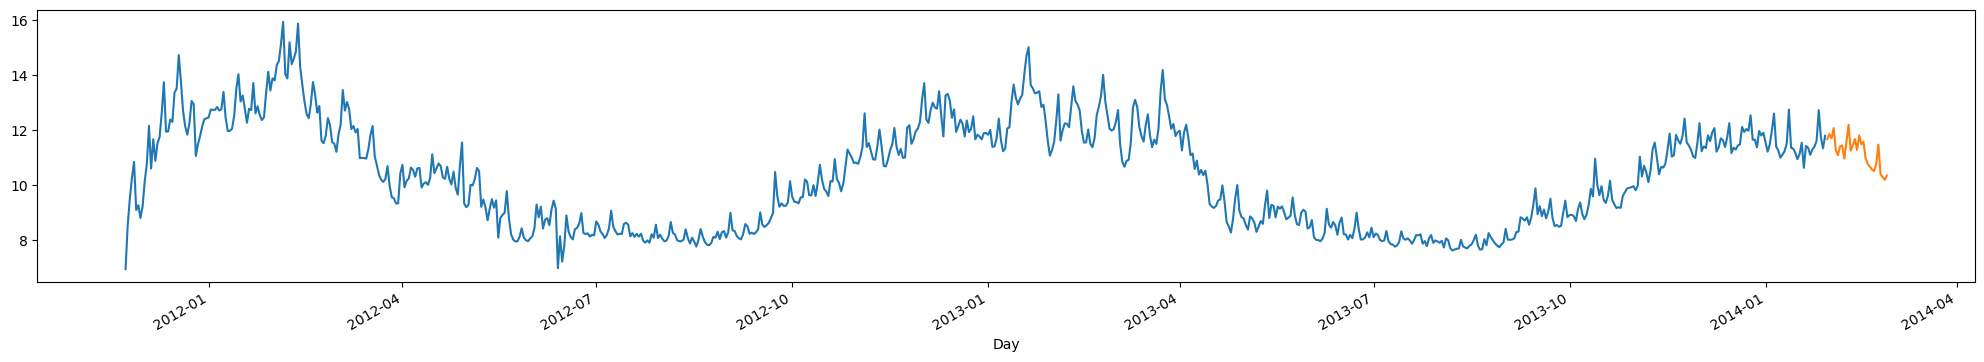

In [11]:
train['avg_energy'].plot(figsize=(25,4))
test['avg_energy'].plot(figsize=(25,4))

** ACF PACF ** 

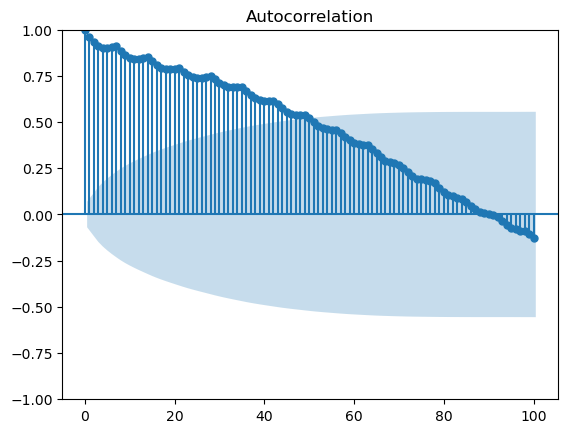

In [22]:
plot_acf(train.avg_energy,lags=100)
plt.show()

>> If the ACF shows a gradual decline and does not cut off sharply, this suggests that the series is not stationary and may require differencing to remove a trend or to reduce long-term dependence.

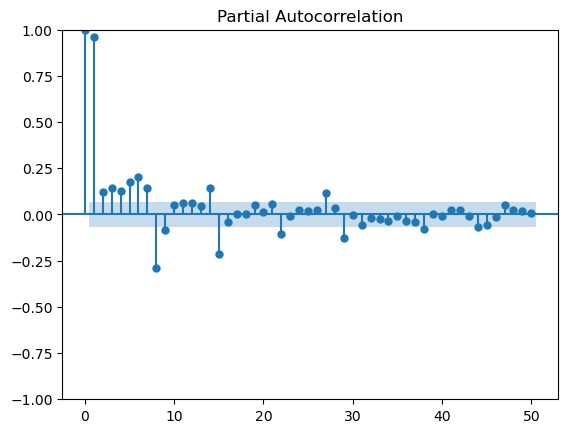

In [23]:
plot_pacf(train.avg_energy,lags=50)
plt.show()

>> If the PACF shows a sharp cut-off while the ACF tails off gradually (which seems to be the case), it suggests an AR(p) model might be appropriate, where p is the lag after which the PACF cuts off.

In [24]:
t  = sm.tsa.adfuller(train.avg_energy, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.895846
p-value                          0.334018
#Lags Used                      21.000000
Number of Observations Used    776.000000
dtype: float64

In [25]:
def difference_df(timeseries, interval=1):
    diff = [timeseries[i] - timeseries[i - interval] for i in range(interval, len(timeseries))]
    return pd.DataFrame(diff, columns=['avg_energy'])

In [26]:
#apply the 1st order differencing
diff = difference_df(train.avg_energy, interval=1)

C:\Users\visot\AppData\Local\Temp\ipykernel_12956\3567401102.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diff = [timeseries[i] - timeseries[i - interval] for i in range(interval, len(timeseries))]


In [27]:
t  = sm.tsa.adfuller(diff, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -6.724823e+00
p-value                        3.410643e-09
#Lags Used                     2.000000e+01
Number of Observations Used    7.760000e+02
dtype: float64

> this mean that the null hypothesis can be rejected. d = 1

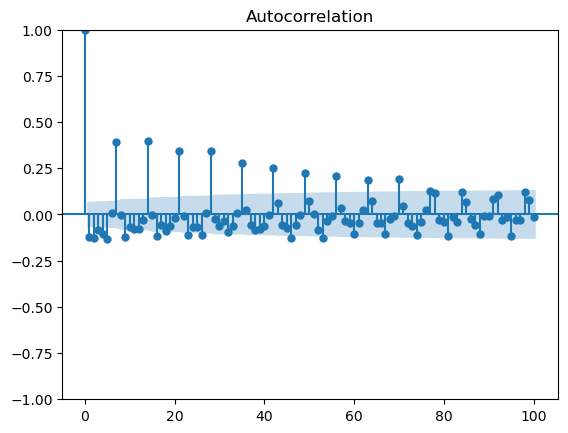

In [28]:
plot_acf(diff, lags=100)
plt.show()

> The ACF plot shows a significant spike at lag **1** and then the autocorrelations quickly fall within the confidence interval, which suggests that the differencing has removed any autoregressive structure from the data.

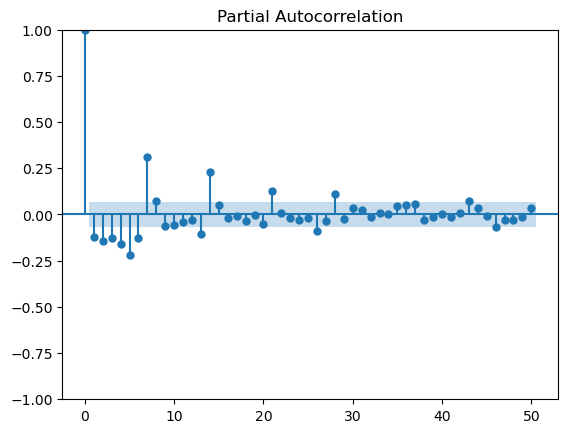

In [29]:
plot_pacf(diff, lags=50)
plt.show()

> The PACF plot shows a significant spike at lag **1**, and then the partial autocorrelations also fall within the confidence interval, which is consistent with an AR(1) process. This suggests that there may be one lag of autoregressive term in the data.

# Seasonality Decomposition

In [30]:
s = sm.tsa.seasonal_decompose(train.avg_energy, period=12)

<Axes: xlabel='Day'>

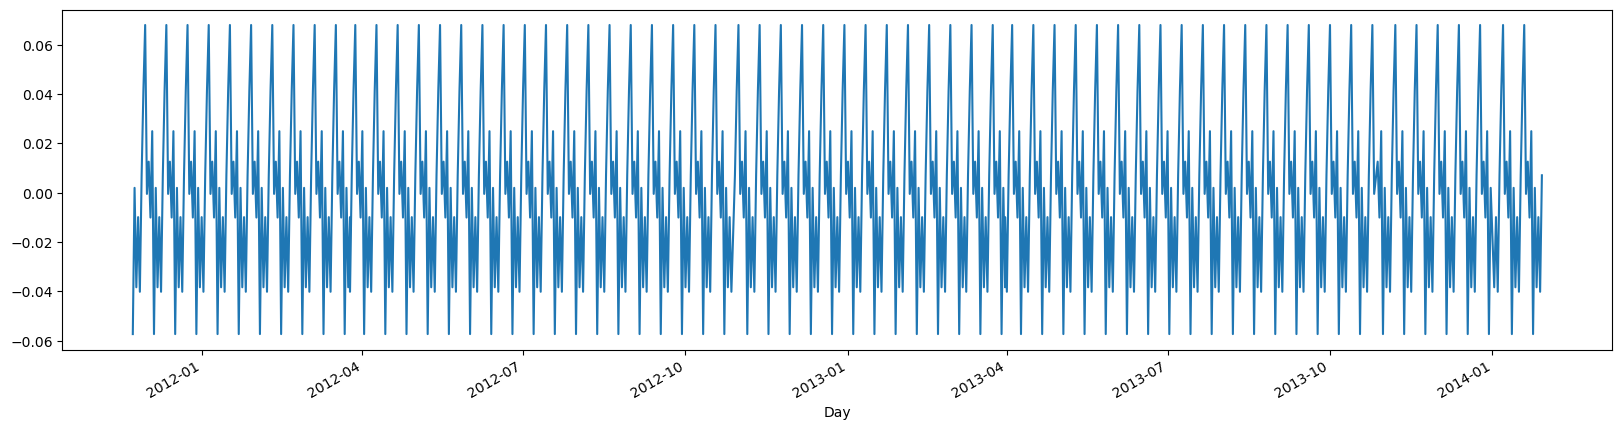

In [31]:
s.seasonal.plot(figsize=(20,5))

<Axes: xlabel='Day'>

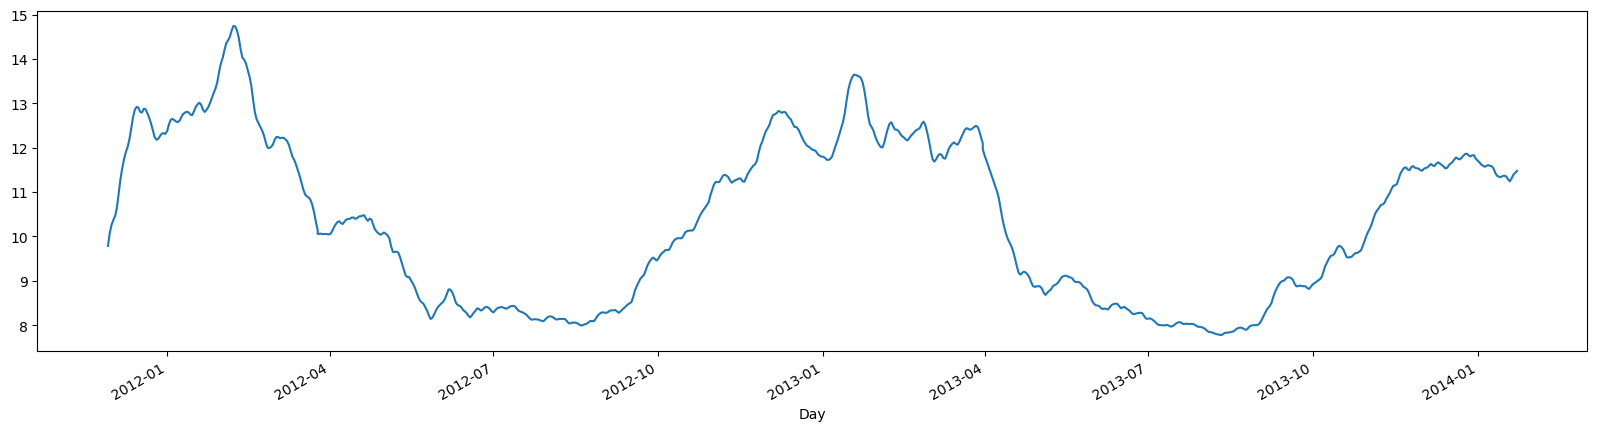

In [32]:
s.trend.plot(figsize=(20,5))

<Axes: xlabel='Day'>

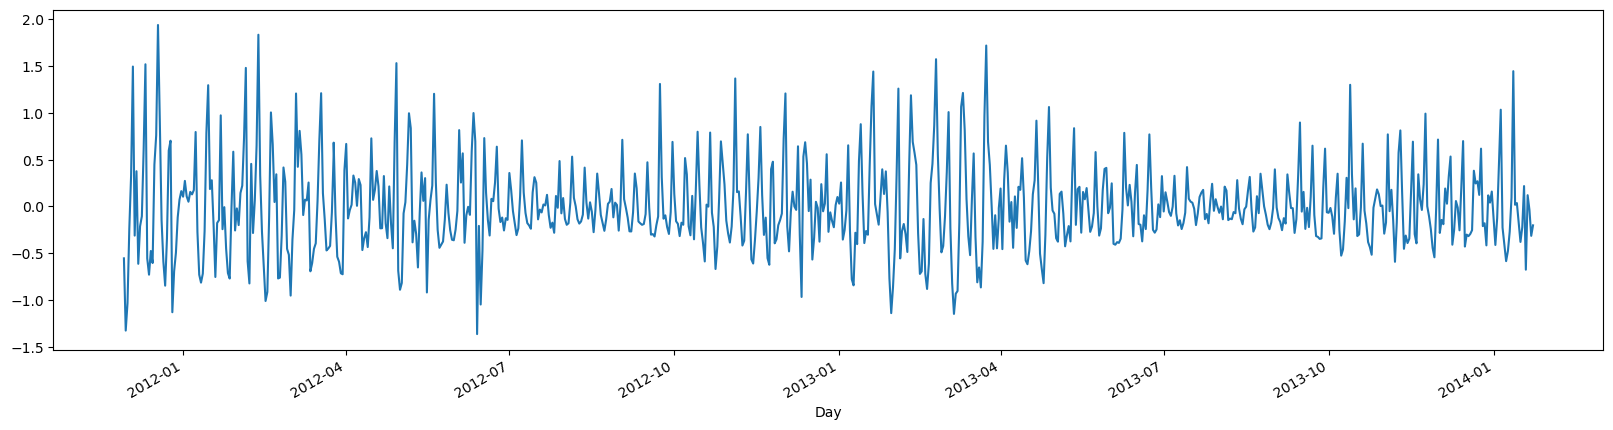

In [33]:
s.resid.plot(figsize=(20,5))

> The seasonal component is quite low while the trend is quite strong with obvious dips in electricity consumption during summers i.e. April to September. This may be attributed to longer days during summer.

In [4]:
from pmdarima.arima import auto_arima
sarimax_model = auto_arima(train['avg_energy'],
                           exogenous=train[['weather_cluster','holiday_ind']],
                           start_p=0, start_q=0,
                           max_p=7, max_q=7,  # Adjust these limits based on computational resources and time
                           start_P=0, start_Q=0,
                           max_P=3, max_Q=3,  # Seasonal parameter ranges
                           m=12,  # Monthly seasonality
                           seasonal=True,  # Enable seasonal differencing
                           d=1, D=1,  # Differencing orders
                           trace=True,  # Print status on the fits
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)  # Stepwise selection to minimize AIC

# Print the summary of the best model found
print(sarimax_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1766.034, Time=0.40 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1540.788, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1764.776, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1396.781, Time=0.59 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1331.442, Time=1.83 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=10.56 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=1362.280, Time=1.14 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=1316.633, Time=2.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1377.825, Time=0.83 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=inf, Time=15.01 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.81 sec
 ARIMA(3,1,0)(3,1,0)[12]             : AIC=1309.012, Time=2.79 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC

In [12]:
# # Create the SARIMAX model instance
# sarimax_model = SARIMAX(endog=train['avg_energy'],
#                         exog=train[['weather_cluster','holiday_ind']],
#                         order=(7, 1, 0),
#                         seasonal_order=(3, 1, 0, 12))

# # Fit the model to the training data
# fitted_model = sarimax_model.fit(disp=False)  # Optionally set disp=False to minimize fitting output

# # Access model summary, use for forecasts, etc.
# print(fitted_model.summary())

C:\Users\visot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\visot\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         avg_energy   No. Observations:                  798
Model:             SARIMAX(7, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -571.743
Date:                            Mon, 19 Feb 2024   AIC                           1169.485
Time:                                    20:37:51   BIC                           1230.139
Sample:                                         0   HQIC                          1192.807
                                            - 798                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
weather_cluster    -0.0017      0.026     -0.064      0.949      -0.053       0.050
holiday_ind        -

In [5]:
import joblib

# Serialize and save the model
joblib.dump(sarimax_model, '../Model/EnergyForecast.sav')  # Adjust compression level as needed


['../Model/EnergyForecast.sav']

In [14]:
print(test.shape)  # e.g., should output something like (30, 3) if you have 3 columns 
print(test[['weather_cluster', 'holiday_ind']].shape) 

(29, 3)
(29, 2)
